In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('usedcar.csv')
print(df.shape)
print(df.info())
display(df.head())

(12, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   価格      12 non-null     int64  
 1   走行距離    12 non-null     float64
 2   乗車年数    12 non-null     int64  
 3   車検      12 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 512.0 bytes
None


,価格,走行距離,乗車年数,車検
0,89,4.3,5,24
1,99,1.9,4,18
2,128,5.2,2,13
3,98,5.1,3,4
4,52,4.0,6,15


In [22]:
corr_coefficient = df['乗車年数'].corr(df['価格'])
print(f"乗車年数と価格の相関係数: {corr_coefficient:.3f}")

corr_scipy, p_value = pearsonr(df['乗車年数'], df['価格'])
print(f"scipy確認値: {corr_scipy:.3f} (p値: {p_value:.4f})")

print(f"\n計算結果: {corr_coefficient:.2f}")

乗車年数と価格の相関係数: -0.911
scipy確認値: -0.911 (p値: 0.0000)

計算結果: -0.91


In [23]:
correlation_matrix = df.corr()
print(correlation_matrix.round(3))

         価格   走行距離   乗車年数     車検
価格    1.000 -0.485 -0.911 -0.085
走行距離 -0.485  1.000  0.277 -0.096
乗車年数 -0.911  0.277  1.000  0.245
車検   -0.085 -0.096  0.245  1.000


In [24]:
# 偏相関係数行列を計算する関数
def partial_correlation_matrix(df):
    R = df.corr().values
    
    R_inv = np.linalg.inv(R)
    
    n = R_inv.shape[0]
    partial_corr = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                partial_corr[i, j] = -R_inv[i, j] / np.sqrt(R_inv[i, i] * R_inv[j, j])
            else:
                partial_corr[i, j] = 1.0
    
    # データフレームに変換
    partial_corr_df = pd.DataFrame(partial_corr, 
                                  index=df.columns, 
                                  columns=df.columns)
    
    return partial_corr_df

partial_corr_matrix = partial_correlation_matrix(df)
print(partial_corr_matrix.round(3))

         価格   走行距離   乗車年数     車検
価格    1.000 -0.570 -0.930  0.306
走行距離 -0.570  1.000 -0.435  0.036
乗車年数 -0.930 -0.435  1.000  0.384
車検    0.306  0.036  0.384  1.000


In [25]:
partial_corr_years_price = partial_corr_matrix.loc['乗車年数', '価格']
print(f"乗車年数と価格の偏相関係数: {partial_corr_years_price:.3f}")

print(f"\n計算結果: {partial_corr_years_price:.2f}")

乗車年数と価格の偏相関係数: -0.930

計算結果: -0.93


## ③ 偏相関係数行列のヒートマップ

<Axes: >

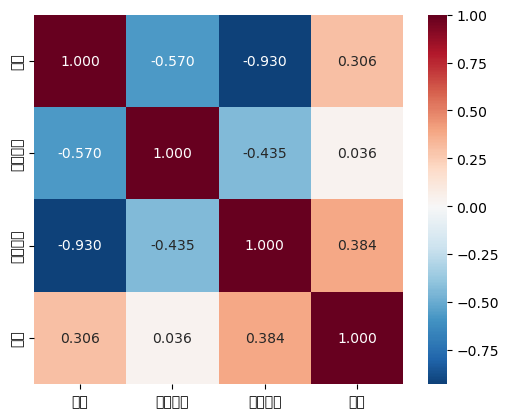

In [26]:
sns.heatmap(partial_corr_matrix, 
            annot=True,           # 数値を表示
            cmap='RdBu_r',       # カラーマップ（赤-青）
            center=0,            # 中心を0に設定
            square=True,         # 正方形のセルにする
            fmt='.3f',           # 小数点以下3桁で表示
)